In [53]:
import pandas as pd
from functools import partial
import multiprocessing as mp
from functools import partial

# df = pd.read_csv("about_us_second_round_with_additional_firms.csv", low_memory=False)
df = pd.read_csv("/Users/vijay/Documents/projects/research/takeda/miu-phrases/sp_2024/miu-website/company_website_second_round_with_additional_firms.csv", low_memory=False)

print("Opened CSV")

Opened CSV


In [54]:
# keywords = [
#     "made in america", "made in u.s.", "made in us", # made in usa and made in us overlap
#     "american made", "usa made", "u.s. made", "us made",
#     "buy american", "buy usa", "buy america",
#     "support america", "support usa", "support u.s.",
#     "patriot",
#     "choose american", "choose usa", "choose u.s.", "choose america",
#     "national pride",
#     "usa based", "america based", "american based", "us based", "u.s. based",
#     "usa produced", "america produced", "american produced", "us produced", "u.s. produced",
#     "american worker", "american job",
#     "veteran owned", "veteran founded", "founded by veteran",
#     "crafted in america", "crafted in u.s.", "crafted in us", # removed "crafted in the usa" due to overlap with crafted in the US
#     "america heritage", "america tradition", "america value",
#     "icon of america", "icon of usa", "icon of u.s.",
#     "america manufactur", "u.s. manufactur", "us manufactur"
# ]


# keywords = [
#     "abroad",
#     "ahn sung ki",
#     "appreciating renminbi",
#     "asean rok",
#     "asian",
#     "bahk byong won",
#     "beijing",
#     "burmese",
#     "cambodia laos burma",
#     "carmaker chery",
#     "chaebol conglomerates",
#     "changfeng motors",
#     "china quarantined",
#     "china textile",
#     "chinese",
#     "communist party plenum",
#     "communist regime",
#     "cross strait",
#     "cyclical downturns",
#     "delegate li junhua",
#     "domestic",
#     "dumpling poisoning",
#     "european",
#     "fledging democracies",
#     "foreigners",
#     "gaeseong industrial complex",
#     "gao hucheng",
#     "garment exporters",
#     "geumgang resort",
#     "global",
#     "government",
#     "guoqi",
#     "hainan airlines",
#     "hakka culture",
#     "hanoi",
#     "hansol paper",
#     "hardline stalinist",
#     "hcm city vietnam",
#     "hermit kingdom",
#     "hite brewery",
#     "hongkong",
#     "indo sino",
#     "indonesian",
#     "inflates exporters",
#     "intentionally oversupplying neighboring",
#     "inter korean",
#     "international",
#     "iranian",
#     "japanese militarism",
#     "kyobo life insurance",
#     "landlocked laos",
#     "liberalising",
#     "mainland",
#     "malaysian",
#     "maritime territorial disputes",
#     "mercantilist policies",
#     "mncs",
#     "mofat",
#     "multinational corporations",
#     "myanmar",
#     "nepalese",
#     "newly industrialising economies",
#     "nk nukes",
#     "nkorean nuke test",
#     "nonmarket economies",
#     "north koreans",
#     "occupied manchuria",
#     "officially pacifist",
#     "overseas",
#     "peoples republic",
#     "poisoned dumplings",
#     "protectionist pressures",
#     "pyongyang",
#     "reminbi",
#     "resolute countermeasures",
#     "restarted psychological warfare",
#     "retaliated militarily",
#     "revolutionary guard ballistic missiles",
#     "singaporean",
#     "sino dprk",
#     "sino japanese",
#     "sk telekom",
#     "sohn kyung shik",
#     "south korea hyundai",
#     "speak fluent mandarin",
#     "taipei taiwanese",
#     "taishang",
#     "taiwanese chipmakers",
#     "tangun trading",
#     "thai",
#     "tiananmen dissident",
#     "tourism organization",
#     "tradeables sector",
#     "transnational corporations",
#     "undervalued renminbi",
#     "venetian macao casino resort",
#     "vietnamese shoemakers",
#     "vinomotor",
#     "wartime militarism",
#     "yuan denominated",
# ]

keywords =  [
    "agricultural",
    "agroforestry fisheries",
    "agroprocessing industries",
    "attracting fdis",
    "brownfields redevelopment",
    "busineses",
    "business",
    "challenges abound",
    "chance",
    "community",
    "continually innovate",
    "creates virtuous circle",
    "demographic trends",
    "disciplined acquisitive",
    "diversification",
    "diversifying geographically",
    "easylearning",
    "economy",
    "economic",
    "economy",
    "engage association memebrs",
    "engender loyalty",
    "entrepeneurial",
    "entrepeneurship",
    "entrepreneurial",
    "excellently positioned",
    "expansion",
    "fosters entrepreneurship",
    "growth",
    "grwoth",
    "highly leverageable",
    "highmark exerts",
    "holistic overview",
    "ideally positioned",
    "incorporating barter",
    "incurring debt",
    "iniatives",
    "innovation",
    "internships apprenticeships",
    "intrapreneurs",
    "intresting news",
    "invent tomorrow",
    "job shadowing",
    "lambert martelle",
    "loan origination volumes",
    "local",
    "locational advantages",
    "multiproduct bundles",
    "mutually beneficial partnerships",
    "mutually beneficial relationship",
    "noninflationary",
    "opportunity",
    "opportunities",
    "potential",
    "preferential treatment",
    "priority privilege",
    "profi tability",
    "profitability",
    "profitabilty",
    "quantifiable roi",
    "rapidly expanding",
    "reskilling",
    "revitalise",
    "restock depleted shelves",
    "revenue",
    "revitalizing downtowns",
    "shareowner value",
    "skilled workforces",
    "streamlined workflows",
    "success",
    "surgeon lemole",
    "sustainabilty",
    "sustainable",
    "synergy",
    "the influence game lobbyists",
    "the long term",
    "thrifty habits",
    "to expand",
    "tremendous",
    "treasuries steady",
    "trickledown effect",
    "underpenetrated",
    "unexplored basins",
    "unlevered balance sheet",
    "unpenetrated",
    "unserved underserved",
    "untapped",
    "upbeat outlooks",
    "upscale midscale",
    "upturn",
    "value proposition",
    "valueadded",
    "varian semiconductor reliance",
    "vending operators",
    "vitalization",
    "wellpositioned",
    "widespread joblessness",
    "willhelp",
    "winwin situation",
    "workforce plus",
]

In [55]:
df.drop(df.columns[:14], axis=1, inplace=True)
df = df.loc[:, ~df.columns.str.contains('\.')]
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_52622/305825213.py:2: SyntaxWarning: invalid escape sequence '\.'
  df = df.loc[:, ~df.columns.str.contains('\.')]


,2023-10,2023-09,2023-08,2023-07,2023-06,2023-05,2023-04,2023-03,2023-02,2023-01,...,1997-07,1997-06,1997-05,1997-04,1997-03,1997-02,1997-01,1996-12,1996-11,1996-10
0,NaN,NaN,NaN,NaN,NaN,NaN,\nGifts for Men | 11 Industries | Gentleman's ...,\nGifts for Men | 11 Industries | Gentleman's ...,\nGifts for Men | 11 Industries | Gentleman's ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,\nDistillery | 11 Wells Distillery | Saint Pau...,\nDistillery | 11 Wells Distillery | Saint Pau...,NaN,\nDistillery | 11 Wells Distillery | Saint Pau...,NaN,\nDistillery | 11 Wells Distillery | Saint Pau...,\nDistillery | 11 Wells Distillery | Saint Pau...,\nDistillery | 11 Wells Distillery | Saint Pau...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,"14th Rose - Handbags, Purses, Woman's Bags\n F...",NaN,NaN,"14th Rose - Handbags, Purses, Woman's Bags\n F...",NaN,"14th Rose - Handbags, Purses, Woman's Bags\n F...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,\nHome - Regal Ware\nWho We Are\nWhy We Work\n...,\nHome - Regal Ware\nWho We Are\nWhy We Work\n...,\nRegal Ware | Enriching Life by Bringing Fami...,NaN,NaN,\nRegal Ware | Enriching Life by Bringing Fami...,NaN,\nRegal Ware | Enriching Life by Bringing Fami...,...,NaN,NaN,NaN,NaN,NaN,NaN,"\nWelcome to Regal Ware, Inc.\nA global leader...","\nWelcome to Regal Ware, Inc.\nA global leader...",NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\nCustom Swim Parkas and Wholesale Fleece Jack...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df.shape

(5189, 325)

In [57]:
columns = list(df.columns)

In [58]:
def count_keywords_in_cell(cell, keywords):
    return sum(1 if keyword.lower() in str(cell).lower() else 0 for keyword in keywords)

def calculate_total_counts(df, columns, keywords):
    total_counts_df = pd.DataFrame(index=df.index, columns=columns, dtype=int).fillna(0)
    
    for index, row in df.iterrows():
        previous_count = 0  # Initialize the previous count
        for col_idx, col in enumerate(reversed(columns)):
            cell_value = row[col]
            current_count = count_keywords_in_cell(cell_value, keywords)
            
            # If the current count is zero and the previous count is greater than zero, use the previous count
            if current_count == 0 and previous_count > 0:
                total_counts_df.at[index, columns[len(columns) - 1 - col_idx]] = previous_count
            else:
                total_counts_df.at[index, columns[len(columns) - 1 - col_idx]] = current_count
                previous_count = current_count  # Update previous count
    
    return total_counts_df

In [59]:
total_counts_df = calculate_total_counts(df, columns, keywords)

In [60]:
total_counts_df

,2023-10,2023-09,2023-08,2023-07,2023-06,2023-05,2023-04,2023-03,2023-02,2023-01,...,1997-07,1997-06,1997-05,1997-04,1997-03,1997-02,1997-01,1996-12,1996-11,1996-10
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5186,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5187,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
document_counts = [0] * len(columns) # Initialize a list to hold the count of documents for each year.

for row in df.itertuples(index=False):# Iterate over each row in the DataFrame.
    previous_count = 0 # Initialize the previous count to 0 for the first iteration.

    for idx in reversed(range(len(columns))):    # Iterate over the columns in reverse order to update the document count.
        value = row[idx] # Access the value using the appropriate index for itertuples() output.
        
        # Check if the current cell has a document (non-NaN and not an empty string).
        if pd.isna(value) or isinstance(value, int):
            document_counts[idx] += previous_count # If there's a document, increment the count for the year and set the previous count to 1.
        else:
            document_counts[idx] += 1 # If there's no document, add the previous year's count to this year's count.
            previous_count = 1 # We have found a document so previous should never be 0



total_documents = sum(document_counts)
document_count_sum = total_documents
# Print the total number of documents.
print(total_documents)

878379


In [62]:
# Extract the count values for the term frequency IDF portion
term_count = {}

# def count_term_existence(keyword):
#     import pandas as pd
#     print("Processing keyword: ", keyword)
#     # Columns indicating years
#     columns = list(df.columns)
#     term_existence = [0] * len(columns)

#     for row in df.itertuples(index=True): # For each website
#         previous_value = 0 # Track the previous value
#         for column in range(len(columns) - 1, -1, -1): # Go from the earliest time to the latest time.
#             if pd.isna(row[column]) or type(row[column]) == int: # Is the value a number or showing a null value?
#                 term_existence[column] += previous_value # Add the most recent value
#             else:
#                 if keyword in row[column].lower(): # is the keyword in the lowercased version of the text?
#                     term_existence[column] += 1 # Yes? then add 1 to the value for this year
#                     previous_value = 1 # Yes? Set the previous value to 1
#                 else:
#                     term_existence[column] += previous_value # Keyword isn't there? If it was there in last year(s), include it this year. 

#     return {keyword: sum(term_existence)} # Sum the value over all of the different years


def count_term_existence(keyword):
    print(f"Processing keyword: {keyword}")
    term_existence = [0] * len(columns)
    
    for index, row in df.iterrows():
        previous_total_count = 0  # Initialize the total count for all keywords in the previous cell
        for col_idx, col in enumerate(reversed(columns)):
            cell_value = row[col]
            current_total_count = total_counts_df.at[index, col]

            if current_total_count == 0 and previous_total_count > 0:
                # If total count drops to 0 but was higher before, carry over the previous value
                term_existence[len(columns) - 1 - col_idx] += 1
            elif pd.isna(cell_value) or isinstance(cell_value, int):
                term_existence[len(columns) - 1 - col_idx] += 0
            else:
                if keyword in cell_value.lower():
                    term_existence[len(columns) - 1 - col_idx] += 1
                else:
                    term_existence[len(columns) - 1 - col_idx] += 0

            if current_total_count == 0 and previous_total_count > 0:
                previous_total_count = previous_total_count
            else:
                previous_total_count = current_total_count  # Update the total count for the next iteration

    return {keyword: sum(term_existence)}


In [63]:
results = [count_term_existence(keyword) for keyword in keywords]

term_count = {}
for result in results:
    term_count.update(result)

print(term_count)

Processing keyword: agricultural
Processing keyword: agroforestry fisheries
Processing keyword: agroprocessing industries
Processing keyword: attracting fdis
Processing keyword: brownfields redevelopment
Processing keyword: busineses
Processing keyword: business
Processing keyword: challenges abound
Processing keyword: chance
Processing keyword: community
Processing keyword: continually innovate
Processing keyword: creates virtuous circle
Processing keyword: demographic trends
Processing keyword: disciplined acquisitive
Processing keyword: diversification
Processing keyword: diversifying geographically
Processing keyword: easylearning
Processing keyword: economy
Processing keyword: economic
Processing keyword: economy
Processing keyword: engage association memebrs
Processing keyword: engender loyalty
Processing keyword: entrepeneurial
Processing keyword: entrepeneurship
Processing keyword: entrepreneurial
Processing keyword: excellently positioned
Processing keyword: expansion
Processi

In [64]:
import math

def generate_final_value_by_year(data):
    keyword, term_existence = data

    print("Processing keyword: ", keyword)
    adjusted_keyword_count = [0] * len(columns)

    if term_existence == 0: # Skip over if this term wasn't counted in any of the years
        return {keyword: adjusted_keyword_count}
    
    for row in df.itertuples(index=True):
        previous_value = 0
        for column in range(len(columns) - 1, -1, -1): # Iterate from least recent to most recent
            if pd.isna(row[column]) or type(row[column]) == int: # Does the current value here not exist?
                adjusted_keyword_count[column] += previous_value # Add in the previous value instead
            else:

                keyword_count = row[column].lower().count(keyword) # This is the term frequency within this document (for not using TF-IDF)
                value = keyword_count # No changes to the value here! (for not using TF-IDF)

                if keyword_count > 0 or value > previous_value: # Is the value greater? Does the keyword count exist
                    adjusted_keyword_count[column] += value # Increment by the value we just got
                    previous_value = value # Set previous value
                else: 
                    adjusted_keyword_count[column] += previous_value # Just use the previous value

    return {keyword: adjusted_keyword_count}

In [65]:
results = [generate_final_value_by_year((keyword, term_count[keyword])) for keyword in keywords]

tf_idf_total = {}
for result in results:
    tf_idf_total.update(result)

print(tf_idf_total)

Processing keyword:  agricultural
Processing keyword:  agroforestry fisheries
Processing keyword:  agroprocessing industries
Processing keyword:  attracting fdis
Processing keyword:  brownfields redevelopment
Processing keyword:  busineses
Processing keyword:  business
Processing keyword:  challenges abound
Processing keyword:  chance
Processing keyword:  community
Processing keyword:  continually innovate
Processing keyword:  creates virtuous circle
Processing keyword:  demographic trends
Processing keyword:  disciplined acquisitive
Processing keyword:  diversification
Processing keyword:  diversifying geographically
Processing keyword:  easylearning
Processing keyword:  economy
Processing keyword:  economic
Processing keyword:  economy
Processing keyword:  engage association memebrs
Processing keyword:  engender loyalty
Processing keyword:  entrepeneurial
Processing keyword:  entrepeneurship
Processing keyword:  entrepreneurial
Processing keyword:  excellently positioned
Processing k

In [66]:
print(tf_idf_total[keywords[0]])

[135, 135, 135, 134, 134, 135, 135, 134, 133, 133, 133, 132, 133, 133, 131, 131, 130, 130, 129, 121, 121, 121, 121, 120, 118, 121, 117, 118, 118, 118, 113, 113, 110, 109, 110, 106, 104, 101, 101, 102, 97, 96, 96, 94, 94, 94, 94, 93, 95, 95, 95, 96, 91, 91, 91, 90, 90, 89, 87, 88, 90, 90, 89, 90, 89, 88, 87, 88, 87, 86, 86, 85, 85, 84, 84, 84, 84, 85, 84, 82, 81, 81, 81, 82, 82, 83, 83, 80, 79, 79, 79, 79, 78, 78, 77, 76, 76, 76, 75, 76, 76, 76, 73, 73, 71, 71, 70, 68, 57, 57, 57, 57, 57, 54, 53, 53, 53, 52, 51, 51, 51, 50, 50, 50, 50, 47, 47, 45, 43, 42, 42, 42, 40, 39, 43, 43, 39, 39, 39, 39, 38, 38, 38, 38, 38, 37, 35, 35, 35, 35, 35, 36, 36, 36, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 31, 30, 29, 29, 28, 28, 28, 28, 28, 27, 26, 26, 26, 26, 26, 26, 24, 24, 24, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 15, 15, 14, 13, 13, 13, 13, 13,

In [67]:
year_sums = [0] * len(columns)
for keyword in keywords: # Going through all of the keywords
    if type(tf_idf_total[keyword]) == int: # This is a redundant invalid check
        continue
    for column in range(len(columns)): # Go through all of the years
        year_sums[column] += tf_idf_total[keyword][column] # Adding up all the sums per year 
    
for column in range(len(columns)): 
    # print(column)
    # print(document_count[column])   
    # print(year_sums[column], document_count[column])

    try:
        year_sums[column] /= document_counts[column]
    except ZeroDivisionError:
        year_sums[column] /= 1
print(year_sums[:10])

[4.712104689203926, 4.7162191661209345, 4.692878986456968, 4.685258092738407, 4.718285214348207, 4.712502737026495, 4.700065775049331, 4.619978046103183, 4.583259911894273, 4.565821389195149]


In [68]:
print(df.columns.tolist())

['2023-10', '2023-09', '2023-08', '2023-07', '2023-06', '2023-05', '2023-04', '2023-03', '2023-02', '2023-01', '2022-12', '2022-11', '2022-10', '2022-09', '2022-08', '2022-07', '2022-06', '2022-05', '2022-04', '2022-03', '2022-02', '2022-01', '2021-12', '2021-11', '2021-10', '2021-09', '2021-08', '2021-07', '2021-06', '2021-05', '2021-04', '2021-03', '2021-02', '2021-01', '2020-12', '2020-11', '2020-10', '2020-09', '2020-08', '2020-07', '2020-06', '2020-05', '2020-04', '2020-03', '2020-02', '2020-01', '2019-12', '2019-11', '2019-10', '2019-09', '2019-08', '2019-07', '2019-06', '2019-05', '2019-04', '2019-03', '2019-02', '2019-01', '2018-12', '2018-11', '2018-10', '2018-09', '2018-08', '2018-07', '2018-06', '2018-05', '2018-04', '2018-03', '2018-02', '2018-01', '2017-12', '2017-11', '2017-10', '2017-09', '2017-08', '2017-07', '2017-06', '2017-05', '2017-04', '2017-03', '2017-02', '2017-01', '2016-12', '2016-11', '2016-10', '2016-09', '2016-08', '2016-07', '2016-06', '2016-05', '2016-04'

325 [Timestamp('2023-10-01 00:00:00'), Timestamp('2023-09-01 00:00:00'), Timestamp('2023-08-01 00:00:00')]


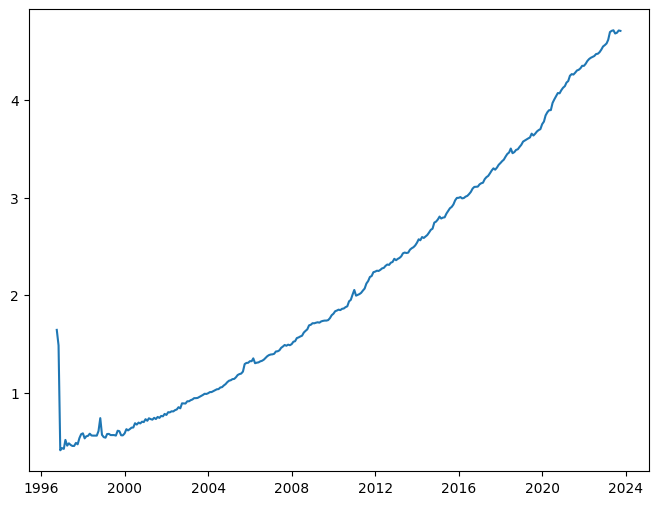

In [69]:
columns = pd.to_datetime(list(df.columns)) # Going back to the original dataframe and getting the columns from there
columns = list(columns) # Turning it from Pandas format to list format

print(len(columns), columns[:3])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(columns, list(year_sums)) # Plotting it!

In [70]:
company_website_year_sums = year_sums

In [71]:
company_website_year_sums_columns = columns

In [72]:
about_us_year_sums = year_sums

In [73]:
about_us_year_sums_columns = columns

In [74]:
about_us_year_sums

[4.712104689203926,
 4.7162191661209345,
 4.692878986456968,
 4.685258092738407,
 4.718285214348207,
 4.712502737026495,
 4.700065775049331,
 4.619978046103183,
 4.583259911894273,
 4.565821389195149,
 4.551777434312211,
 4.519805266651914,
 4.493247730794775,
 4.477413640389726,
 4.474290780141844,
 4.453960505879743,
 4.445234392357254,
 4.435971542907959,
 4.4229741763134465,
 4.402675585284281,
 4.375083724045546,
 4.352914898369444,
 4.353388503690449,
 4.328170594837261,
 4.312331233123312,
 4.305749718151071,
 4.283227848101266,
 4.263621976034366,
 4.268342391304348,
 4.251475261007717,
 4.197407323174892,
 4.180761340323683,
 4.144718792866941,
 4.128663003663004,
 4.103140041256016,
 4.071346639137417,
 4.074031365313653,
 4.043045591298311,
 4.009306654257794,
 3.972444653791804,
 3.8989851309889074,
 3.897964015151515,
 3.877167973390354,
 3.8442857142857143,
 3.7812202097235463,
 3.754653937947494,
 3.703270470279303,
 3.694019138755981,
 3.67911877394636,
 3.6567522187574

In [75]:
company_website_year_sums

[4.712104689203926,
 4.7162191661209345,
 4.692878986456968,
 4.685258092738407,
 4.718285214348207,
 4.712502737026495,
 4.700065775049331,
 4.619978046103183,
 4.583259911894273,
 4.565821389195149,
 4.551777434312211,
 4.519805266651914,
 4.493247730794775,
 4.477413640389726,
 4.474290780141844,
 4.453960505879743,
 4.445234392357254,
 4.435971542907959,
 4.4229741763134465,
 4.402675585284281,
 4.375083724045546,
 4.352914898369444,
 4.353388503690449,
 4.328170594837261,
 4.312331233123312,
 4.305749718151071,
 4.283227848101266,
 4.263621976034366,
 4.268342391304348,
 4.251475261007717,
 4.197407323174892,
 4.180761340323683,
 4.144718792866941,
 4.128663003663004,
 4.103140041256016,
 4.071346639137417,
 4.074031365313653,
 4.043045591298311,
 4.009306654257794,
 3.972444653791804,
 3.8989851309889074,
 3.897964015151515,
 3.877167973390354,
 3.8442857142857143,
 3.7812202097235463,
 3.754653937947494,
 3.703270470279303,
 3.694019138755981,
 3.67911877394636,
 3.6567522187574

In [76]:
# Create a DataFrame
df_final = pd.DataFrame({
    'year_month_day': about_us_year_sums_columns,
    'company_website_year_sums': company_website_year_sums,
    'about_us_year_sums': about_us_year_sums
})

# Add the combined column
df_final['combined'] = df_final['company_website_year_sums'] + df_final['about_us_year_sums']

print(df_final)

    year_month_day  company_website_year_sums  about_us_year_sums  combined
0       2023-10-01                   4.712105            4.712105  9.424209
1       2023-09-01                   4.716219            4.716219  9.432438
2       2023-08-01                   4.692879            4.692879  9.385758
3       2023-07-01                   4.685258            4.685258  9.370516
4       2023-06-01                   4.718285            4.718285  9.436570
..             ...                        ...                 ...       ...
320     1997-02-01                   0.421053            0.421053  0.842105
321     1997-01-01                   0.429167            0.429167  0.858333
322     1996-12-01                   0.406926            0.406926  0.813853
323     1996-11-01                   1.483333            1.483333  2.966667
324     1996-10-01                   1.642857            1.642857  3.285714

[325 rows x 4 columns]


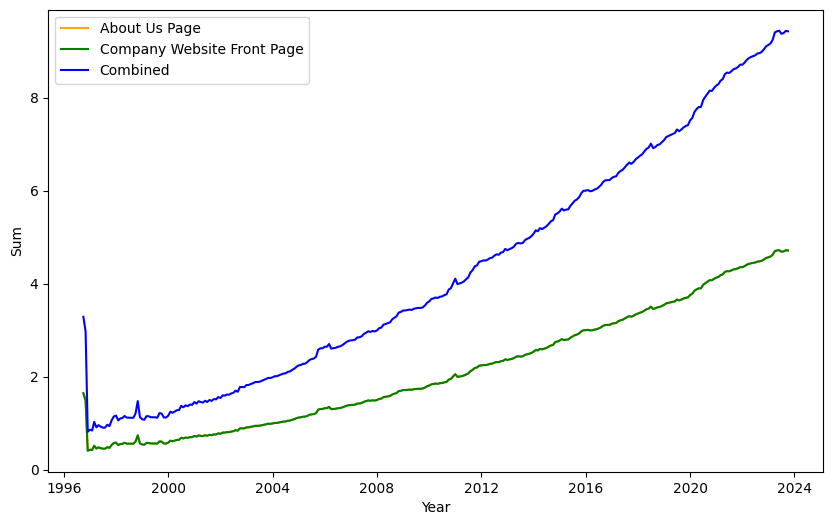

In [77]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot each series
plt.plot(df_final['year_month_day'], df_final['about_us_year_sums'], label='About Us Page', color='orange')
plt.plot(df_final['year_month_day'], df_final['company_website_year_sums'], label='Company Website Front Page', color='green')
plt.plot(df_final['year_month_day'], df_final['combined'], label='Combined', color='blue')

# Set labels for x and y axes
plt.xlabel('Year')
plt.ylabel('Sum')

# Add legend
plt.legend()

# Show plot
plt.show()

In [78]:
df_final.to_csv("C:\\Users\\theal\\research\\plot_recreation\\tf_idf_values.csv", index=False)